In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk import sent_tokenize,word_tokenize 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import warnings
warnings.filterwarnings('ignore')


In [2]:
dataset = 'winemag-data-130k-v2.csv'

In [3]:
df = pd.read_csv(dataset, index_col = 'Unnamed: 0')

In [4]:
df.head(30)
df

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [5]:
np.array(str(df[df.columns[0]].values))
country_num =df['country'].unique()
df = df.dropna(subset=['price','points','country','province','variety','winery']).reset_index(drop=True)
province_num =df['province'].unique()
variety_num =df['variety'].unique()
winery_num =df['winery'].unique()

In [6]:
from scipy.stats import pearsonr
print("Pearson Correlation:", pearsonr(df.price, df.points))

Pearson Correlation: (0.4161971360153307, 0.0)


In [7]:
country_array = pd.get_dummies(df[df.columns[0]].values)
province_array =pd.get_dummies(df[df.columns[5]].values)
vareity_array = pd.get_dummies(df[df.columns[11]].values)
winery_array = pd.get_dummies(df[df.columns[12]].values)


In [8]:
train_df = [df['price'],country_array,province_array,vareity_array,df['points']]
df_model = pd.concat(train_df, axis=1)

In [9]:
df_model

,price,Argentina,Armenia,Australia,Austria,Bosnia and Herzegovina,Brazil,Bulgaria,Canada,Chile,...,Yapincak,Zibibbo,Zierfandler,Zierfandler-Rotgipfler,Zinfandel,Zlahtina,Zweigelt,Çalkarası,Žilavka,points
0,15.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,87
1,14.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,87
2,13.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,87
3,65.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,87
4,15.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120910,28.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,90
120911,75.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,90
120912,30.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,90
120913,32.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,90


In [10]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_model, test_size = 0.3)
x_train = train.iloc[0:,0:1156]#independent variables 
y_train = train['points']# last column 
x_test = test.iloc[0:,0:1156]
y_test = test['points']
y_train

100391    86
7945      87
23703     85
20647     92
38716     91
          ..
115847    89
24824     92
2634      86
34009     91
108233    85
Name: points, Length: 84640, dtype: int64

# Correlation

In [11]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train,y_train)
model.coef_

array([ 2.59870362e-02, -1.09480060e+10,  2.28110231e+10, ...,
        2.13244975e+07,  2.13244961e+07,  0.00000000e+00])

In [12]:
import statsmodels.api as sm
print(sm.OLS(df.points, df.price).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 points   R-squared (uncentered):                   0.440
Model:                            OLS   Adj. R-squared (uncentered):              0.440
Method:                 Least Squares   F-statistic:                          9.503e+04
Date:                Mon, 21 Nov 2022   Prob (F-statistic):                        0.00
Time:                        16:49:15   Log-Likelihood:                     -6.7854e+05
No. Observations:              120915   AIC:                                  1.357e+06
Df Residuals:                  120914   BIC:                                  1.357e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

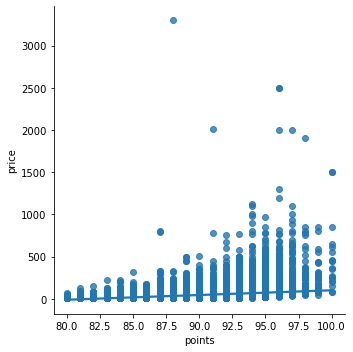

In [13]:
import seaborn as sns
sns.lmplot(y = 'price', x='points', data=df)

# Regressive Model

In [14]:
testing_predictions  = model.predict(x_test)
testing_predictions


array([88.77007604, 88.54161906, 88.32789969, ..., 89.67962289,
       88.76366258, 88.16042447])

In [15]:
y_test

75675     90
79290     93
16113     88
12862     86
111052    86
          ..
90259     88
6802      82
34995     93
87867     89
89716     85
Name: points, Length: 36275, dtype: int64

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import r2_score
r2_score(y_test, testing_predictions)


-62105834864543.375

In [17]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train,y_train)

y_pred = logit.predict(x_test)

In [18]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.17337008959338387

# Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=13)
clf.fit(X=x_train,y=y_train)

DecisionTreeClassifier(random_state=13)

In [20]:
clf.score(X=x_test, y=y_test)

0.19299793246037217

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
model = tree.DecisionTreeRegressor(max_depth=3)
#model = DecisionTreeRegressor(max_depth = 3)
model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

#### This is trying to make a tree visualization:
- will work if we have a smaller depth

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0432508 to fit



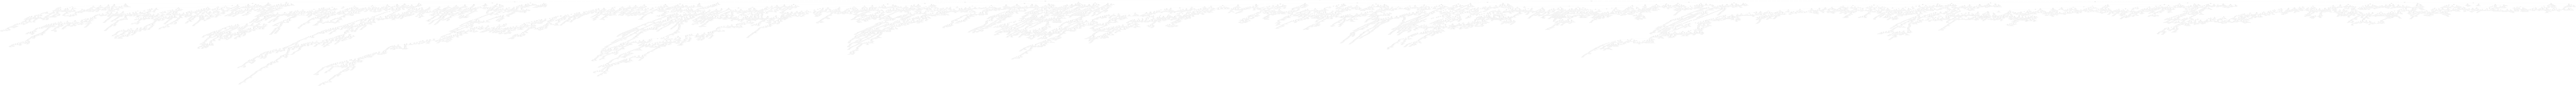

In [59]:
from sklearn import tree
import pydotplus 
# from pyspark.ml import Pipeline
feature_names = feature_names = [key for key in x_train if not key=='points']
from IPython.display import Image
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=feature_names)
import pydotplus

graph = pydotplus.graphviz.graph_from_dot_data(dot_data)

Image(graph.create_png())

In [61]:
dot_data = tree.export_graphviz(clf, out_file="ourtree.dot", feature_names=feature_names)
import pydotplus
graph = pydotplus.graphviz.graph_from_dot_file("ourtree.dot")

## Neural Network:

In [96]:
def sigmoid(x,deriv=False):
    if deriv:
        return x*(1-x)
    return 1/(1+np.exp(-x))

def run_net(X,y,activation_function=sigmoid,passes=10):
    import time
    np.random.seed(1)
    syn0 =2*np.random.random((1156,1)) - 1 # need to fix these wights shape
    syn1 = 2*np.random.random((84640,1)) - 1 # need to fix these weights shape

    for i in range(passes):
        level_0 = X
        level_1 = activation_function(np.dot(level_0,syn0)) 
        level_2 = activation_function(np.dot(level_1,syn1))

        level_2_error = y - level_2

        level_2_delta = level_2_error*activation_function(level_2,deriv=True)

        level_1_error = level_2_delta.dot(syn1.T)

        level_1_delta = level_1_error * activation_function(level_1,deriv=True)

        syn1 += level_1.T.dot(level_2_delta)
        syn0 += level_0.T.dot(level_1_delta)
    print(level_2)
    return syn0,syn1

In [97]:

syn0,syn1 = run_net(x_train,y_train,activation_function=sigmoid,passes=100)


ValueError: shapes (84640,1) and (84640,1) not aligned: 1 (dim 1) != 84640 (dim 0)

### KNN Model

In [52]:
# can play with the number of neighbors

from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)

knn_model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [54]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(x_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

2.3048844056705895

In [57]:
test_preds = knn_model.predict(x_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

2.56084604386366

In [56]:
# test_preds = knn_model.predict(x_test)
# metrics.accuracy_score(y_test, test_preds)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets